# K-Means
K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

## ¿Cómo funciona K-Means?
El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:
- Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
- Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.
Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Ejemplo:
https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html

## Implementando K-means en Python con Sklearn
Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Importamos el archivo csv -para simplificar, suponemos que el archivo se encuentra en el mismo directorio que el notebook- y vemos los primeros 5 registros del archivo tabulados.

In [2]:
dataframe = pd.read_csv("data.csv")
#print (dataframe)
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


También podemos ver una tabla de información estadística que nos provee Pandas dataframe:

In [6]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


El archivo contiene diferenciadas 2 categorías -clientes que salieron de la empresa (1) y clientes que no lo hicieron (0). 

In [7]:
print(dataframe.groupby('Exited').size())


Exited
0    7963
1    2037
dtype: int64


## Visualización de Datos
Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

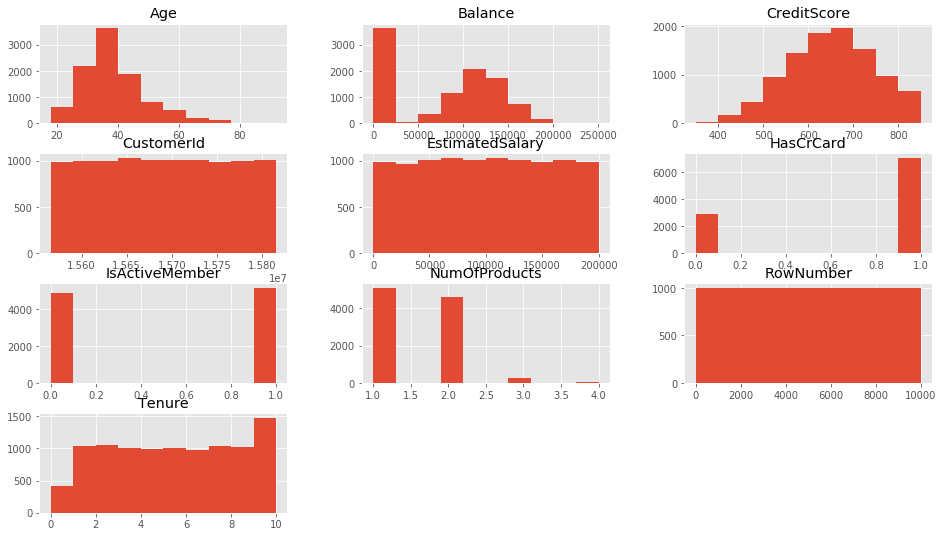

In [8]:
dataframe.drop(['Exited'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: "CreditScore", "Age" y "EstimatedSalary" y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

C:\Users\carlo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


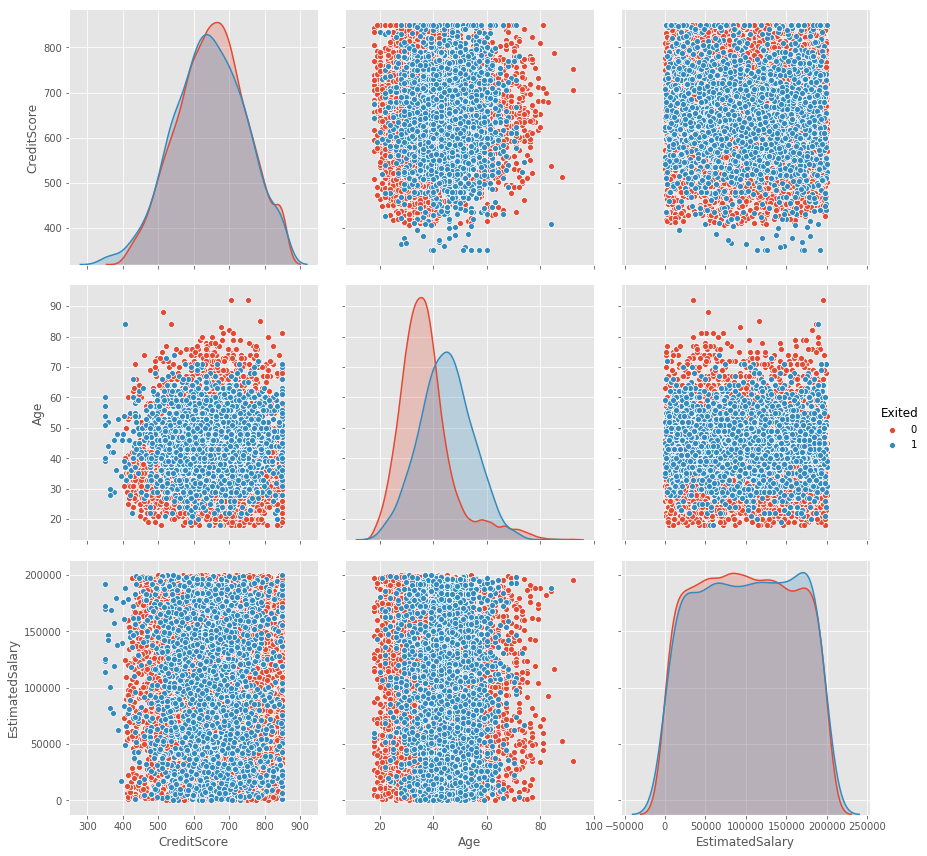

In [13]:
sb.pairplot(dataframe.dropna(), hue='Exited',height=4,vars=["CreditScore","Age","EstimatedSalary"],kind='scatter')

Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre los usuarios y sus categorías.

## Definimos la entrada

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas "CreditScore", "Age" y "EstimatedSalary" en nuestra variable X.

In [14]:
X = np.array(dataframe[["CreditScore","Age","EstimatedSalary"]])
y = np.array(dataframe['Exited'])
X.shape

(10000, 3)

Ahora veremos una gráfica en 3D con 2 colores representando las categorías.

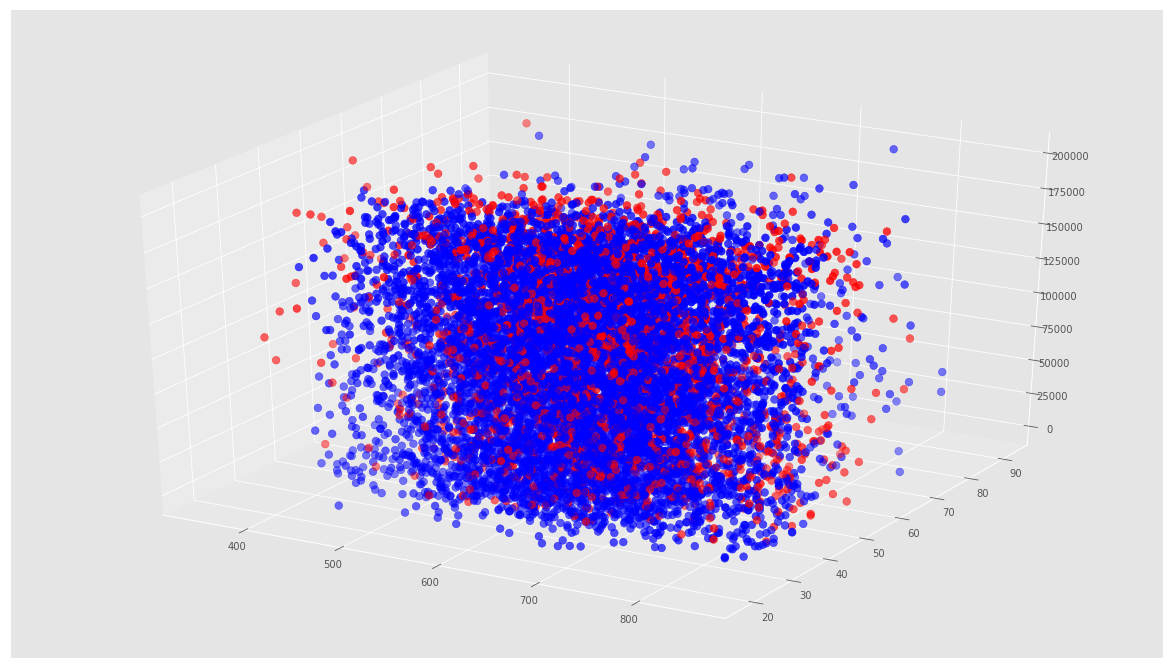

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

## Obtener el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

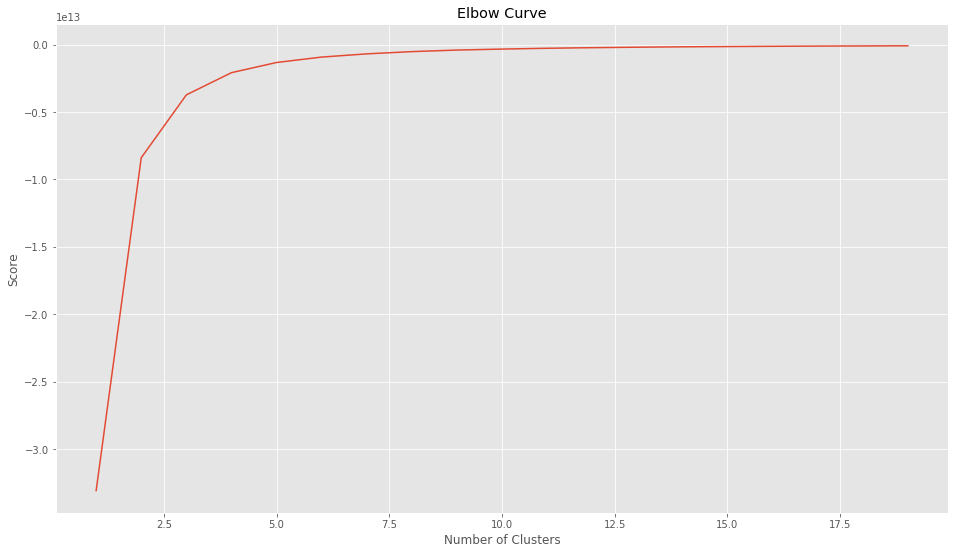

In [16]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 2 como un buen número para K. Según vuestro criterio podría ser otro.

## Ejecutamos K-Means

Ejecutamos el algoritmo para 2 clusters y obtenemos las etiquetas y los centroids.

In [19]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.51042929e+02 3.90663992e+01 5.02644404e+04]
 [6.50017747e+02 3.87780658e+01 1.49617979e+05]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: 

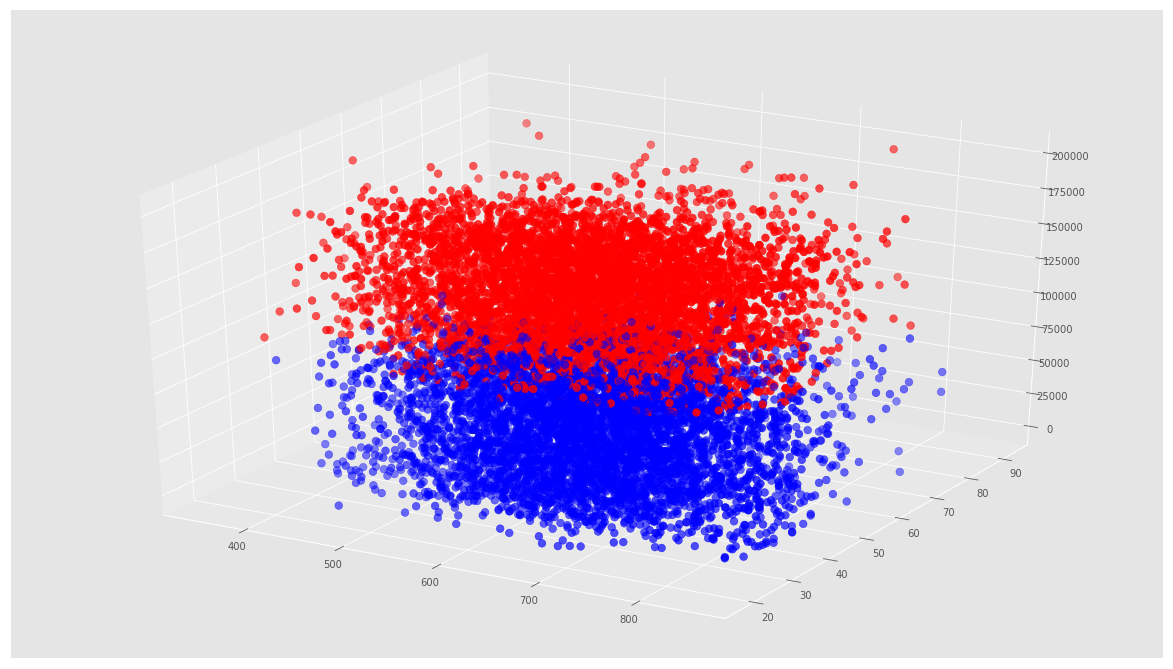

In [22]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=['orange','yellow'], s=1000)
plt.show()

Aqui podemos ver que el Algoritmo de K-Means con K=2 ha agrupado a los 10000 usuarios de esta empresa en dos grupos, teniendo en cuenta las 3 dimensiones que utilizamos: "CreditScore", "Age" y "EstimatedSalary". 

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

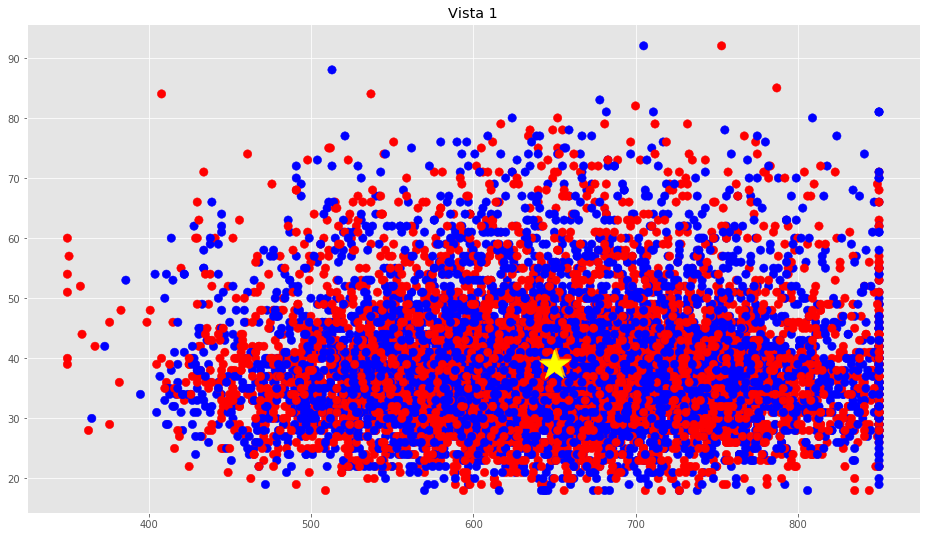

In [23]:
# Getting the values and plotting it
f1 = dataframe['CreditScore'].values
f2 = dataframe['Age'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=['orange','yellow'], s=1000)
plt.title('Vista 1')
plt.show()

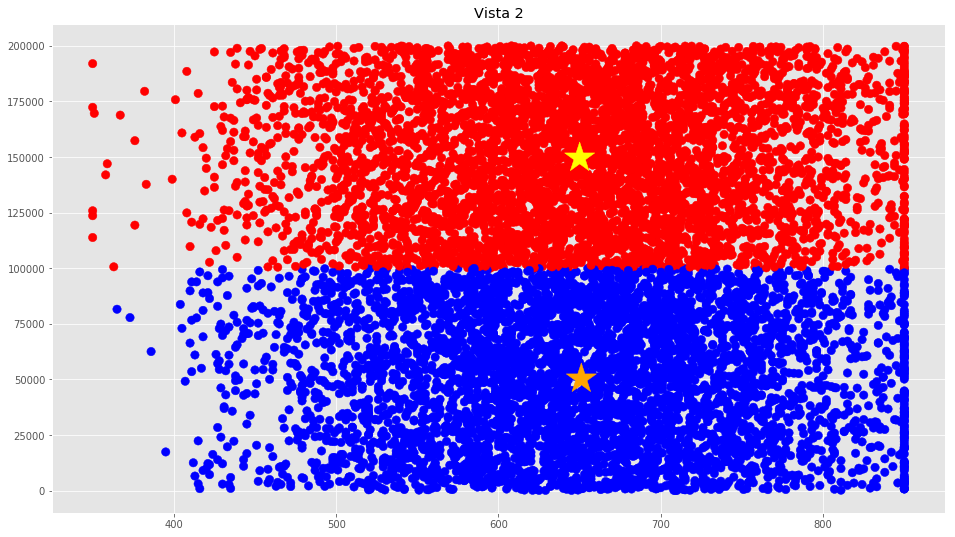

In [24]:
# Getting the values and plotting it
f1 = dataframe['CreditScore'].values
f2 = dataframe['EstimatedSalary'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=['orange','yellow'], s=1000)
plt.title('Vista 2')
plt.show()

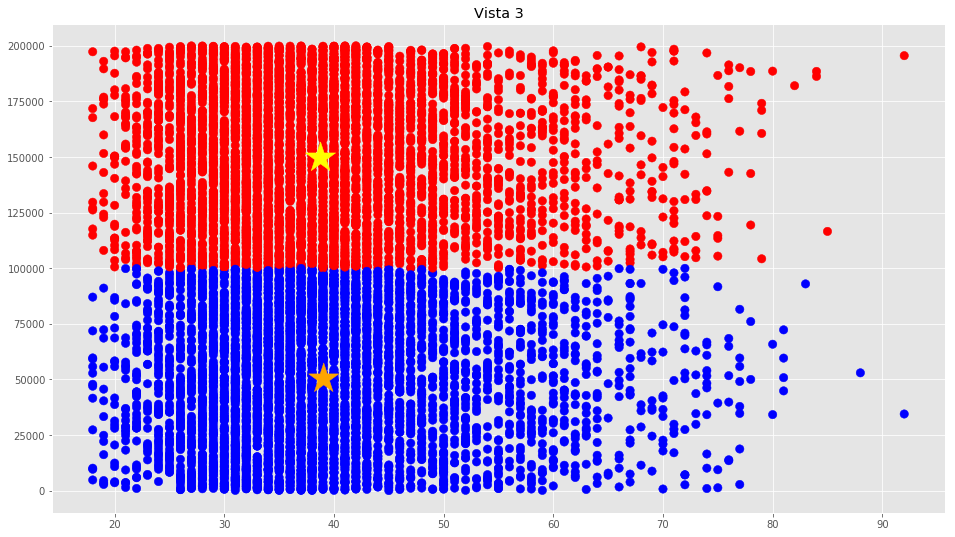

In [25]:
# Getting the values and plotting it
f1 = dataframe['Age'].values
f2 = dataframe['EstimatedSalary'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=['orange','yellow'], s=1000)
plt.title('Vista 3')
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [26]:
copy =  pd.DataFrame()
copy['CustomerId']=dataframe['CustomerId'].values
copy['Exited']=dataframe['Exited'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,4989
1,red,5011


In [27]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Exited']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('Exited').size()
diversidadGrupo

,Exited,cantidad
0,0,3996
1,1,993


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:   

In [30]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

users=dataframe['CustomerId'].values
for row in closest:
    print(users[row])
    

15758692
15633461


Y por ultimo calculamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso del 50%. Esto indica que el modelo no es el de mayor eficacia para el caso de tratar de predecir si el cliente va abandonar o no la empresa.

In [31]:
 ## Validación de nuestro modelo
y_test = y    
y_pred = labels
print(metrics.accuracy_score(y_test, y_pred))

0.504
